In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import Series
from bokeh.plotting import figure, show
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

In [64]:
df = pd.read_csv("Data/IPG2211A2N.csv", index_col='DATE', parse_dates=True )
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-05-01,3.4609


In [65]:
df.tail()

,IPG2211A2N
DATE,
2023-08-01,117.3450
2023-09-01,103.2197
2023-10-01,94.4084
2023-11-01,99.1045
2023-12-01,111.8714


In [66]:
df.duplicated().sum()

69

In [67]:
#Removing all duplicates: To remove all duplicate rows, regardless of their order, use keep=False
df.drop_duplicates(inplace=False)

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-06-01,3.5117
...,...
2023-08-01,117.3450
2023-09-01,103.2197
2023-10-01,94.4084


In [68]:
df.duplicated().sum()

69

In [69]:
df.dtypes

IPG2211A2N    float64
dtype: object

# Why it's needed:
- 
Extracting date components can be useful for analysis. For example, it allows you to analyze data at different granularities such as daily, monthly, or yearly patterns- .
Creating a "Weekend" column can be beneficial for understanding patterns related to weekends. This column can be used in analysis or modeling to capture potential differences in behavior between weekdays and weekends.

In [70]:
df.index = pd.to_datetime(df.index)  # Convert the index to datetime format

# Extract day, month, year, day of week, and week (same as above)
df["Day"] = df.index.day
df["Month"] = df.index.month
df["Year"] = df.index.year
df["Day of week"] = df.index.dayofweek
df["Week"] = df.index.isocalendar().week

df.head()

,IPG2211A2N,Day,Month,Year,Day of week,Week
DATE,,,,,,
1939-01-01,3.3336,1,1,1939,6,52
1939-02-01,3.3591,1,2,1939,2,5
1939-03-01,3.4354,1,3,1939,2,9
1939-04-01,3.4609,1,4,1939,5,13
1939-05-01,3.4609,1,5,1939,0,18


In [71]:
# Filter the DataFrame to include only rows within the specified range
df1 = df[(df.index >= '1980-01-01') & (df.index <= '2020-01-01')]

In [72]:
df1.head()

,IPG2211A2N,Day,Month,Year,Day of week,Week
DATE,,,,,,
1980-01-01,64.4041,1,1,1980,1,1
1980-02-01,63.8043,1,2,1980,4,5
1980-03-01,59.9710,1,3,1980,5,9
1980-04-01,52.3178,1,4,1980,1,14
1980-05-01,49.0551,1,5,1980,3,18


In [73]:
df1.tail()

,IPG2211A2N,Day,Month,Year,Day of week,Week
DATE,,,,,,
2019-09-01,103.1273,1,9,2019,6,35
2019-10-01,93.8114,1,10,2019,1,40
2019-11-01,99.9641,1,11,2019,4,44
2019-12-01,109.9062,1,12,2019,6,48
2020-01-01,112.9423,1,1,2020,2,1


In [74]:
df1.dtypes

IPG2211A2N     float64
Day              int32
Month            int32
Year             int32
Day of week      int32
Week            UInt32
dtype: object

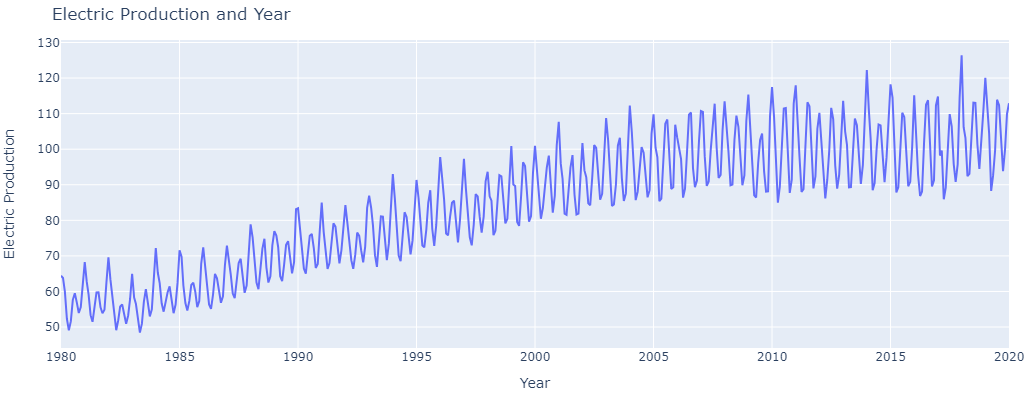

In [75]:
# Assuming df1 is your DataFrame
fig = px.line(df1, x=df1.index, y='IPG2211A2N', labels={'IPG2211A2N': 'Electric Production'})
fig.update_layout(title='Electric Production and Year', xaxis_title='Year', yaxis_title='Electric Production', height=400,
                 margin=dict(l=20, r=20, t=40, b=20)
)

# Show the plot
fig.show()


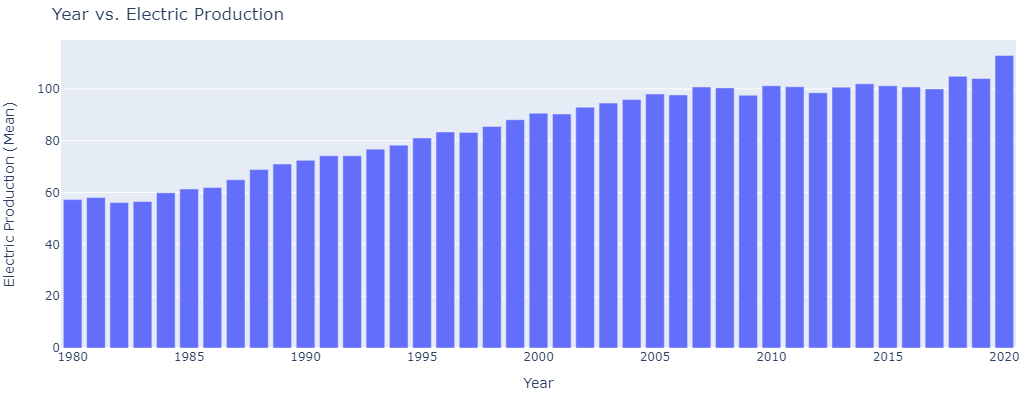

In [76]:
# Year Vs Electric Production
fig = px.bar(
    df1.groupby("Year")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Year",
    y="IPG2211A2N",
    labels={"Year": "Year", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Year vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Year",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()

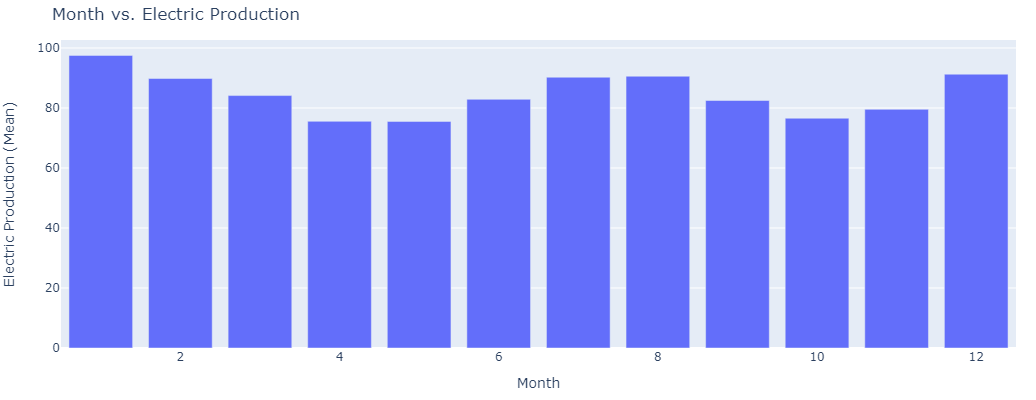

In [77]:
#month vs electric production
fig = px.bar(
    df1.groupby("Month")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Month",
    y="IPG2211A2N",
    labels={"Month": "Month", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Month vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Month",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()

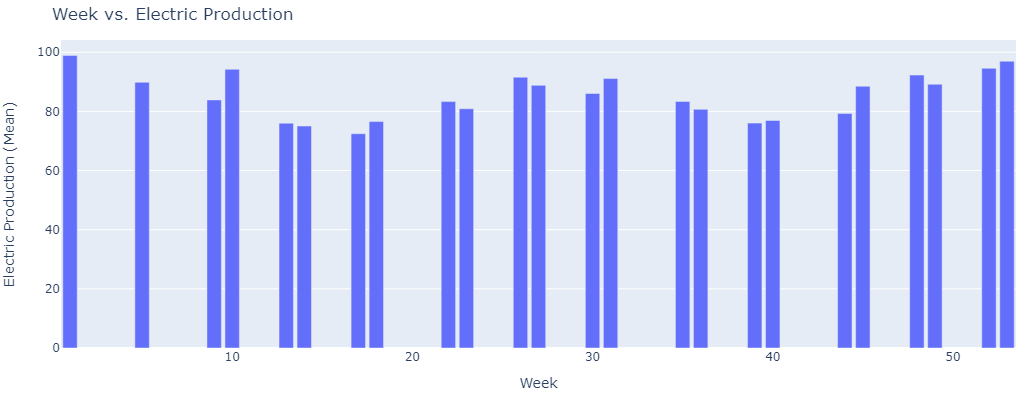

In [78]:
#week number vs electric production
fig = px.bar(
    df1.groupby("Week")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Week",
    y="IPG2211A2N",
    labels={"Week": "Week", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Week vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Week",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()
#Production is stable across weeks

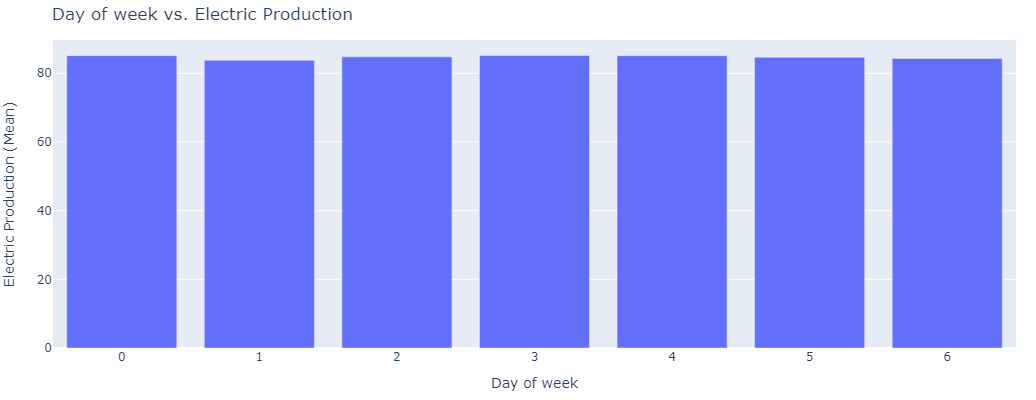

In [79]:
#day of week vs electric production
fig = px.bar(
    df1.groupby("Day of week")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Day of week",
    y="IPG2211A2N",
    labels={"Day of week": "Day of week", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Day of week vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Day of week",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()
#Production is stable across the days

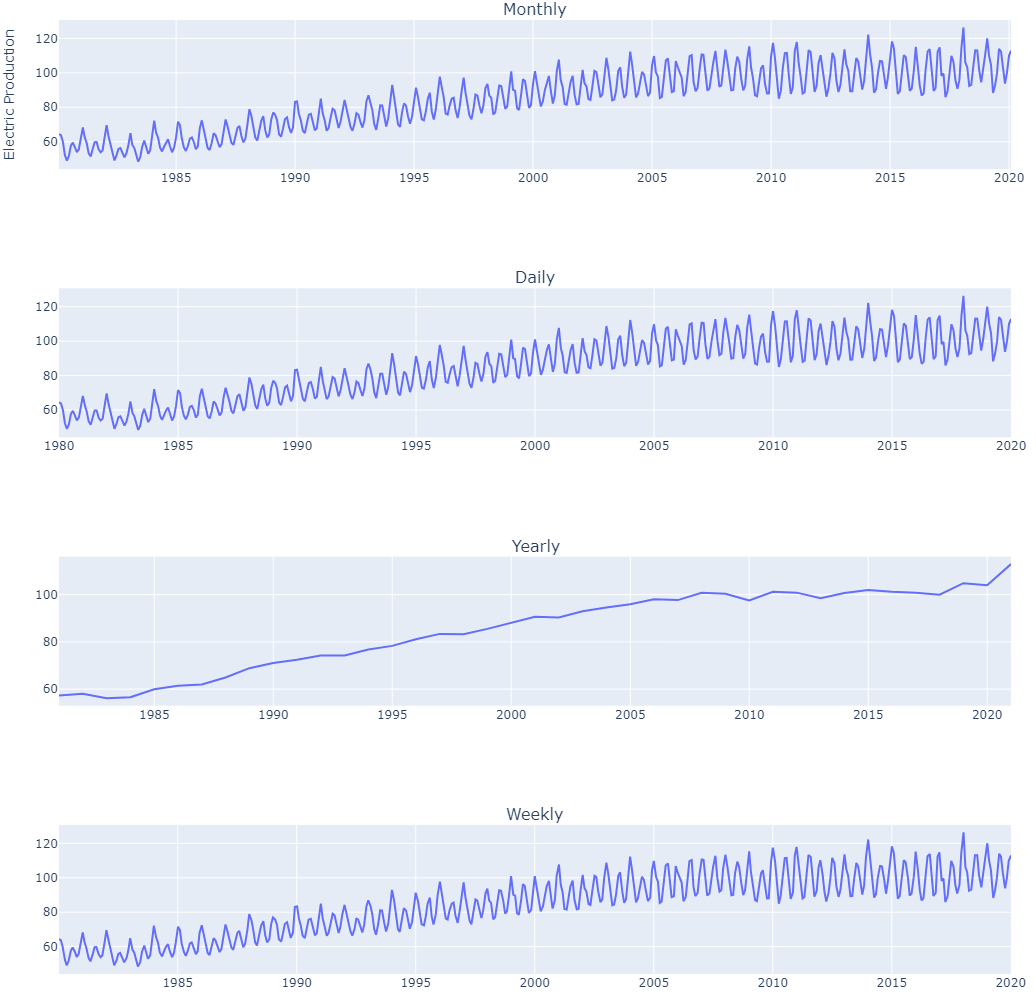

In [94]:
# Resample the data
month = df1.resample("M").mean().dropna()
day = df1.resample("D").mean().dropna()
year = df1.resample("A").mean().dropna()
week = df1.resample("W").mean().dropna()

# Create subplots with shared y-axis
fig = make_subplots(  # Call the make_subplots function correctly
    rows=4, cols=1, shared_yaxes=True, subplot_titles=("Monthly", "Daily", "Yearly", "Weekly")
)

# Plot the data
trace = px.line(month, x=month.index, y="IPG2211A2N").data[0]  # Extract the first trace
fig.add_trace(trace, row=1, col=1)  # Add the extracted trace to the subplot

trace = px.line(day, x=day.index, y="IPG2211A2N").data[0]
fig.add_trace(trace, row=2, col=1)

trace = px.line(year, x=year.index, y="IPG2211A2N").data[0]
fig.add_trace(trace, row=3, col=1)

trace = px.line(week, x=week.index, y="IPG2211A2N").data[0]
fig.add_trace(trace, row=4, col=1)


#Customize Layout
fig.update_layout(
    height=1000,  # Adjust height as needed
    yaxis_title="Electric Production",
    margin=dict(l=10, r=10, t=20, b=10),  # Adjust margins for better spacing
)

# Show the plots
fig.show()